In [17]:
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *

In [18]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')

In [21]:
backend_config = backend.configuration()

In [22]:
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns")    # The configuration returns dt in seconds, so multiply by
                                        # 1e9 to get nanoseconds

Sampling time: 0.2222222222222222 ns


In [23]:
backend_defaults = backend.defaults()

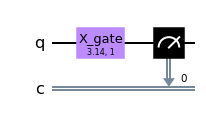

In [25]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

circ = QuantumCircuit(1, 1)
custom_gate = Gate('X_gate', 1, [3.14, 1])
# 3.14 is an arbitrary parameter for demonstration
circ.append(custom_gate, [0])
circ.measure(0, 0)

circ.draw('mpl')

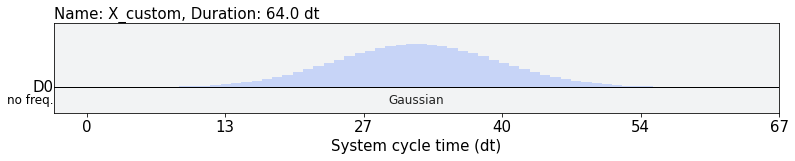

In [27]:
with pulse.build(backend, name='X_custom') as my_schedule:
    pulse.shift_frequency
    pulse.play(Gaussian(duration=64, amp=0.2, sigma=8), pulse.drive_channel(0))

circ.add_calibration('X_gate', [0], my_schedule, [3.14, 1])

my_schedule.draw()

In [30]:
job = backend.run(circ, shots=1024, meas_level=1)
result = job.result()

In [31]:
geom_result = job.result(timeout=3600)

In [33]:
# Ignis discriminator fitter tools
from sklearn.svm import SVC
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, MeasurementFilter
from qiskit.ignis.measurement.discriminator.filters import DiscriminationFilter
from qiskit.ignis.measurement.discriminator.iq_discriminators import SklearnIQDiscriminator

%matplotlib inline

In [37]:
cal_result_disc = job.result(timeout=3600)
svc = SVC(C=0.01, kernel="rbf", gamma="scale")
svc_discriminator = SklearnIQDiscriminator(svc, geom_result, [0], ['1'])
filter012 = DiscriminationFilter(svc_discriminator)

QiskitError: 'Number of input schedules and assigned states must be equal.'